# **GO SKRIPSI**

# **Libraries**

In [ ]:
!pip install wordcloud

In [ ]:
!pip install Sastrawi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 4.7 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt
import nltk, os, re, string
from nltk.stem import PorterStemmer
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud
from gensim.models import Word2Vec
from sklearn.model_selection import train_test_split
import warnings

warnings.filterwarnings('ignore')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

In [ ]:
from google.colab import files

# **Export Data**

In [ ]:
df = pd.read_csv('/content/Twitter_Emotion_Dataset_Baru.csv')

# **Data exploration**

In [ ]:
df.head(10)

,label,tweet
0,shock,"Pengen sih, simple ga ribetin dan ga ngutang. ..."
1,sadness,beli kaos banyak dengan ukuran yg udah downgra...
2,happy,"Persahabatan itu tidak perlu filosopi, tidak m..."
3,anger,kaga lah gw jg bukan cw tolol si daniel co bul...
4,sadness,Hampir 7 taun di jogja. Skrng lagi packing per...
5,anger,DUL ERA JOKOWI JAUH LEBIH BAIK DARI PADA REZIM...
6,sadness,Kuota tidak lain dan tidak bukan habis karena ...
7,happy,"Alhamdulillah, hari ini Senin tggl 9 Juli 2018..."
8,anger,Lanjut...@bankmandiri saya sudah berkali kali ...
9,sadness,Wktu masih jaman sekolah kalau ada laki2 yg su...


In [ ]:
df.shape

(6538, 2)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6538 entries, 0 to 6537
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   6538 non-null   object
 1   tweet   6536 non-null   object
dtypes: object(2)
memory usage: 102.3+ KB


<Axes: >

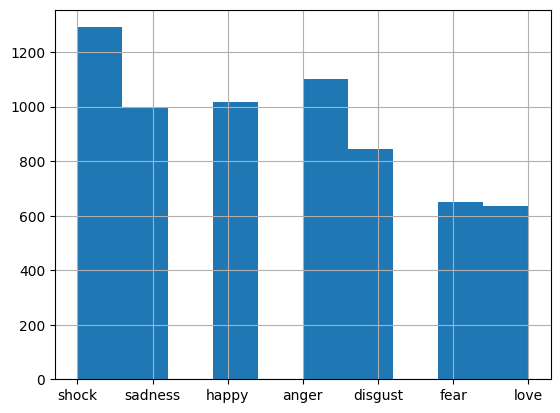

In [ ]:
df['label'].hist()

# **Data Preprocessing & Data Cleaning**

In [ ]:
df['tweet'] = df['tweet'].astype(str)

In [ ]:
#Mengubah huruf kapital menjadi huruf kecil
#Menghilangkan tanda baca

# Fungsi untuk membersihkan teks
def clean_text(text):
    # Hapus tag username
    text = re.sub(r'@\w+', '', text)
    # Hapus kata [USERNAME] dan [URL]
    text = re.sub(r'\[USERNAME\]|\[URL\]', '', text)
    # Hapus tautan (URL)
    text = re.sub(r'http\S+', '', text)
    # Tambahkan spasi setelah tanda koma
    text = re.sub(r',', ', ', text)
    # Hapus karakter non-alfanumerik dan ubah ke huruf kecil
    text = re.sub('[^A-Za-z0-9\s]+', '', text)
    text = text.lower()
    # Tambahkan spasi di kata yang menyambung
    text = re.sub(r'(\w)([A-Z])', r'\1 \2', text)

    return text

# Terapkan fungsi pembersihan pada kolom 'tweet'
df['cleaned_tweet'] = df['tweet'].apply(clean_text)

# Tampilkan DataFrame hasil
print(df)

        label                                              tweet  \
0       shock  Pengen sih, simple ga ribetin dan ga ngutang. ...   
1     sadness  beli kaos banyak dengan ukuran yg udah downgra...   
2       happy  Persahabatan itu tidak perlu filosopi, tidak m...   
3       anger  kaga lah gw jg bukan cw tolol si daniel co bul...   
4     sadness  Hampir 7 taun di jogja. Skrng lagi packing per...   
...       ...                                                ...   
6533    shock  @gibran_tweet Astaga...itu poto profil mu mas ...   
6534  disgust  @willyumarrymee @mlbbfess Bau banget gacha kof...   
6535    shock  @capsicumxvulpes ASTAGA GEMES BANGET!!! AAAAAK...   
6536  disgust       @KidOfFun @euonwo gatau itu kak enu jorok :(   
6537     fear  Membeli kolak untuk berbuka puasa. Biasanya ha...   

                                          cleaned_tweet  
0     pengen sih  simple ga ribetin dan ga ngutang b...  
1     beli kaos banyak dengan ukuran yg udah downgra...  
2     per

In [ ]:
df.head(20)

,label,tweet,cleaned_tweet
0,shock,"Pengen sih, simple ga ribetin dan ga ngutang. ...",pengen sih simple ga ribetin dan ga ngutang b...
1,sadness,beli kaos banyak dengan ukuran yg udah downgra...,beli kaos banyak dengan ukuran yg udah downgra...
2,happy,"Persahabatan itu tidak perlu filosopi, tidak m...",persahabatan itu tidak perlu filosopi tidak m...
3,anger,kaga lah gw jg bukan cw tolol si daniel co bul...,kaga lah gw jg bukan cw tolol si daniel co bul...
4,sadness,Hampir 7 taun di jogja. Skrng lagi packing per...,hampir 7 taun di jogja skrng lagi packing pera...
5,anger,DUL ERA JOKOWI JAUH LEBIH BAIK DARI PADA REZIM...,dul era jokowi jauh lebih baik dari pada rezim...
6,sadness,Kuota tidak lain dan tidak bukan habis karena ...,kuota tidak lain dan tidak bukan habis karena ...
7,happy,"Alhamdulillah, hari ini Senin tggl 9 Juli 2018...",alhamdulillah hari ini senin tggl 9 juli 2018...
8,anger,Lanjut...@bankmandiri saya sudah berkali kali ...,lanjut saya sudah berkali kali hubungi kantor ...
9,sadness,Wktu masih jaman sekolah kalau ada laki2 yg su...,wktu masih jaman sekolah kalau ada laki2 yg su...


In [ ]:
# Fungsi untuk menghilangkan stopword dari teks
def remove_stopwords(text):
    # Inisialisasi objek StopWordRemoverFactory
    factory = StopWordRemoverFactory()
    stopword_remover = factory.create_stop_word_remover()

    # Menghilangkan stopword dari teks
    text_without_stopwords = stopword_remover.remove(text)

    return text_without_stopwords

# Terapkan fungsi remove_stopwords pada kolom 'cleaned_tweet'
df['stopword_tweet'] = df['cleaned_tweet'].apply(remove_stopwords)

# Tampilkan DataFrame hasil
print(df)

        label                                              tweet  \
0       shock  Pengen sih, simple ga ribetin dan ga ngutang. ...   
1     sadness  beli kaos banyak dengan ukuran yg udah downgra...   
2       happy  Persahabatan itu tidak perlu filosopi, tidak m...   
3       anger  kaga lah gw jg bukan cw tolol si daniel co bul...   
4     sadness  Hampir 7 taun di jogja. Skrng lagi packing per...   
...       ...                                                ...   
6533    shock  @gibran_tweet Astaga...itu poto profil mu mas ...   
6534  disgust  @willyumarrymee @mlbbfess Bau banget gacha kof...   
6535    shock  @capsicumxvulpes ASTAGA GEMES BANGET!!! AAAAAK...   
6536  disgust       @KidOfFun @euonwo gatau itu kak enu jorok :(   
6537     fear  Membeli kolak untuk berbuka puasa. Biasanya ha...   

                                          cleaned_tweet  \
0     pengen sih  simple ga ribetin dan ga ngutang b...   
1     beli kaos banyak dengan ukuran yg udah downgra...   
2     

In [ ]:
df.head(20)

,label,tweet,cleaned_tweet,stopword_tweet
0,shock,"Pengen sih, simple ga ribetin dan ga ngutang. ...",pengen sih simple ga ribetin dan ga ngutang b...,pengen sih simple ga ribetin ga ngutang but ...
1,sadness,beli kaos banyak dengan ukuran yg udah downgra...,beli kaos banyak dengan ukuran yg udah downgra...,beli kaos banyak ukuran yg udah downgrade kuc...
2,happy,"Persahabatan itu tidak perlu filosopi, tidak m...",persahabatan itu tidak perlu filosopi tidak m...,persahabatan perlu filosopi tidak memiliki ni...
3,anger,kaga lah gw jg bukan cw tolol si daniel co bul...,kaga lah gw jg bukan cw tolol si daniel co bul...,kaga lah gw jg bukan cw tolol si daniel co bul...
4,sadness,Hampir 7 taun di jogja. Skrng lagi packing per...,hampir 7 taun di jogja skrng lagi packing pera...,hampir 7 taun jogja skrng packing perasaan kem...
5,anger,DUL ERA JOKOWI JAUH LEBIH BAIK DARI PADA REZIM...,dul era jokowi jauh lebih baik dari pada rezim...,dul era jokowi jauh lebih baik pada rezim sby ...
6,sadness,Kuota tidak lain dan tidak bukan habis karena ...,kuota tidak lain dan tidak bukan habis karena ...,kuota lain tidak bukan habis buka twitter kes...
7,happy,"Alhamdulillah, hari ini Senin tggl 9 Juli 2018...",alhamdulillah hari ini senin tggl 9 juli 2018...,alhamdulillah hari senin tggl 9 juli 2018 mur...
8,anger,Lanjut...@bankmandiri saya sudah berkali kali ...,lanjut saya sudah berkali kali hubungi kantor ...,lanjut berkali kali hubungi kantor cabang saba...
9,sadness,Wktu masih jaman sekolah kalau ada laki2 yg su...,wktu masih jaman sekolah kalau ada laki2 yg su...,wktu jaman sekolah kalau laki2 yg suka boro2 m...


# **Stemming**

In [ ]:
# Inisialisasi objek StemmerFactory
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# Terapkan fungsi stemming pada kolom 'tweet'
df['stemmed_tweet'] = df['stopword_tweet'].apply(stemmer.stem)

In [ ]:
df.head(50)

In [ ]:
# Menyimpan data yang sudah di stemming ke dalam file CSV
df.to_csv('data_preprocessed.csv', columns=['stemmed_tweet', 'label'], index=False)

# Mengunduh file CSV
files.download('data_preprocessed.csv')

NameError: name 'df' is not defined

In [ ]:
df_pre = pd.read_csv('/content/data_preprocessed.csv')

In [ ]:
# Mengonversi tipe data kolom 'stemmed_tweet' ke string
df_pre['stemmed_tweet'] = df_pre['stemmed_tweet'].astype(str)

In [ ]:
df_pre.head(10)

,stemmed_tweet,label
0,ken sih simple ga ribetin ga ngutang but mikir...,shock
1,beli kaos banyak ukur yg udah downgrade kucari...,sadness
2,sahabat perlu filosopi tidak milik nilai hidup...,happy
3,kaga lah gw jg bukan cw tolol si daniel co bul...,anger
4,hampir 7 taun jogja skrng packing asa kemarin ...,sadness
5,dul era jokowi jauh lebih baik pada rezim sby ...,anger
6,kuota lain tidak bukan habis buka twitter kese...,sadness
7,alhamdulillah hari senin tggl 9 juli 2018 muri...,happy
8,lanjut kali kali hubung kantor cabang sabang m...,anger
9,wktu jaman sekolah kalau laki2 yg suka boro2 m...,sadness


In [ ]:
category = pd.get_dummies(df_pre.label)
df_baru = pd.concat([df_pre, category], axis=1)
df_baru = df_baru.drop(columns='label')
df_baru

,stemmed_tweet,anger,disgust,fear,happy,love,sadness,shock
0,ken sih simple ga ribetin ga ngutang but mikir...,False,False,False,False,False,False,True
1,beli kaos banyak ukur yg udah downgrade kucari...,False,False,False,False,False,True,False
2,sahabat perlu filosopi tidak milik nilai hidup...,False,False,False,True,False,False,False
3,kaga lah gw jg bukan cw tolol si daniel co bul...,True,False,False,False,False,False,False
4,hampir 7 taun jogja skrng packing asa kemarin ...,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...
6533,astagaitu poto profil mu mas waliiii,False,False,False,False,False,False,True
6534,bau banget gacha kof skrg,False,True,False,False,False,False,False
6535,astaga gemes banget aaaaak chibi gemoy pegang ...,False,False,False,False,False,False,True
6536,gatau kak enu jorok,False,True,False,False,False,False,False


In [ ]:
text = df_baru['stemmed_tweet'].values
label = df_baru[['anger', 'fear', 'love', 'sadness', 'shock', 'happy', 'disgust']].values

In [ ]:
text_train, text_test, label_train, label_test = train_test_split(text, label, test_size=0.3)

# X_train dan y_train dapat digunakan sebagai data training
# X_test dan y_test dapat digunakan sebagai data testing
print("Train Data size:", len(text_train))
print("Test Data size", len(text_test))

Train Data size: 4576
Test Data size 1962


In [ ]:
text_train

array(['akun jual gue bau banget anjir gue mau jual aja liat tweet2 eek',
       'repot tu kalo dar baca erti nahh situ timbul salah bukan paham selektif argument ndakk papa nalar tetep jalur bukan keluar jalur kalo dah keluar jalur ituu langgar celotehreceh',
       'belasut mesra papa pirang romeo rabun serabi solo punya kak ronzzykevin wkwkwkkwkw belasut mesra sih dulu rame wkwkwk',
       ...,
       'prof mohon kira dishare cerita lengkap soal foto ibu yg jepret salat maghrib gereja ayam pniel kmrn biar gak informasi yg sepotongsepotong trims prof',
       'anjay rem baca replyannya dulu gue daftar tekkim suka kimia gk lolos untung nyasar farmasi fisika gak banyak',
       'ketek aku bau banget'], dtype=object)

In [ ]:
text_test

array(['lama gue jd head of dept sampe jd gm hotel gue paling benci and langsung kepala gue tanduk kl anak buah gue tanya jawab ga tau sekali gue maafin dua kali tiga masih jawab ga tau plaakkk',
       'takut banget takut d bawa kabur soalx dulu pernah alam bawa kabur keluar kota untung bang ojek yg bawa daku kabur waktu pikir aq g bakal lari hmmmm g tau aq pux duit 30 ebong buat ngibrit',
       'saking sibuk aku lupa jam 4 mv rilis iya sibuk sibuk nyari sibuk baca ebook heran accounting apa awal bulan ga kerja',
       ...,
       'sayang akuuuu udah gede banget sih kamuuuu gak asa asa baru kemarin lahir skrg udah gede aja bawel banget',
       'selasela sibuk kantor kalau tibatiba kangen tobio gue seringkali liat foto video di handphone god sayang banget gue sama tobio',
       'berita pendeta yg ngebunuh anak angkat kalo ga salah pun korban kondisi hamil bunuh perkosa dulu miris kali'],
      dtype=object)

In [ ]:
tokenizer = Tokenizer(num_words=5000, oov_token='x')

tokenizer.fit_on_texts(text_train)

sequences_train = tokenizer.texts_to_sequences(text_train)
sequences_test = tokenizer.texts_to_sequences(text_test)

padded_train = pad_sequences(sequences_train)
padded_test = pad_sequences(sequences_test)

# **TF-IDF Model**

In [ ]:
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(text_train)
X_test_tfidf = tfidf_vectorizer.transform(text_test)

In [ ]:
X_train_tfidf_array = X_train_tfidf.toarray()
X_test_tfidf_array = X_test_tfidf.toarray()

In [ ]:
X_train_tfidf_reshaped = X_train_tfidf_array.reshape((X_train_tfidf_array.shape[0], 1, X_train_tfidf_array.shape[1]))
X_test_tfidf_reshaped = X_test_tfidf_array.reshape((X_test_tfidf_array.shape[0], 1, X_test_tfidf_array.shape[1]))

In [ ]:
param_grid = {
    'batch_size': [64, 128, 256],
    'optimizer': ['adam', 'rmsprop'],  # Menambahkan optimizer
    'activation': ['relu', 'tanh']  # Menambahkan aktivasi
}

from tensorflow.keras.optimizers import Adam, RMSprop

def build_model(input_shape, optimizer, activation):
    model = tf.keras.Sequential([
        tf.keras.layers.LSTM(128, activation='relu', input_shape=input_shape),
        tf.keras.layers.Dense(64, activation=activation),
        tf.keras.layers.Dense(32, activation=activation),
        tf.keras.layers.Dropout(0.01),
        tf.keras.layers.Dense(7, activation='softmax')
    ])

    if optimizer == 'adam':
        opt = Adam()
    elif optimizer == 'rmsprop':
        opt = RMSprop()

    model.compile(loss='categorical_crossentropy',
                  optimizer=opt,
                  metrics=['accuracy'])
    return model

from sklearn.model_selection import ParameterGrid

best_accuracy = 0
best_params = {}

input_shape = (1, X_train_tfidf_array.shape[1])

# Loop over hyperparameters
for params in ParameterGrid(param_grid):
    batch_size = params['batch_size']
    optimizer = params['optimizer']
    activation = params['activation']

    print(f"Training with batch_size={batch_size}, optimizer={optimizer}, activation={activation}")

    model = build_model(input_shape, optimizer, activation)

    callbacks = [mycallbacks()]

    history = model.fit(X_train_tfidf_reshaped,
                        label_train,
                        batch_size=batch_size,
                        epochs=num_epochs,
                        validation_data=(X_test_tfidf_reshaped, label_test),
                        verbose=1,
                        callbacks=callbacks)

    loss, accuracy = model.evaluate(X_test_tfidf_reshaped, label_test)
    print('Test loss:', loss)
    print('Test accuracy:', accuracy)

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_params = {
            'batch_size': batch_size,
            'optimizer': optimizer,
            'activation': activation
        }

print("Best Parameters:", best_params)
print("Best Accuracy:", best_accuracy)

Training with batch_size=64, optimizer=adam, activation=relu
Epoch 1/20
72/72 [==============================] - 8s 88ms/step - loss: 1.8673 - accuracy: 0.2758 - val_loss: 1.6405 - val_accuracy: 0.3914
Epoch 2/20
72/72 [==============================] - 4s 61ms/step - loss: 1.1799 - accuracy: 0.5870 - val_loss: 0.9417 - val_accuracy: 0.6769
Epoch 3/20
72/72 [==============================] - 5s 70ms/step - loss: 0.5200 - accuracy: 0.8632 - val_loss: 0.8312 - val_accuracy: 0.7125
Epoch 4/20
72/72 [==============================] - 8s 107ms/step - loss: 0.2173 - accuracy: 0.9495 - val_loss: 0.8991 - val_accuracy: 0.7125
Epoch 5/20
72/72 [==============================] - ETA: 0s - loss: 0.0908 - accuracy: 0.9836
Epoch 4 
Accuracy has reached = 98.36% so training is cancelled
62/62 [==============================] - 1s 8ms/step - loss: 0.9764 - accuracy: 0.7125
Test loss: 0.9764003753662109
Test accuracy: 0.7125382423400879
Training with batch_size=64, optimizer=rmsprop, activation=relu
E

In [ ]:
model = tf.keras.Sequential([
tf.keras.layers.LSTM(128, activation='tanh', input_shape=(1, X_train_tfidf_array.shape[1])),
tf.keras.layers.Dense(64, activation='tanh'),
tf.keras.layers.Dense(32, activation='tanh'),
tf.keras.layers.Dropout(0.01),
tf.keras.layers.Dense(7, activation='softmax')
])

model.compile(loss='categorical_crossentropy',
optimizer='RMSprop',
metrics=['accuracy'])

class mycallbacks(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        if logs.get('accuracy') >= 0.90:
            print('\nEpoch', epoch, '\nAccuracy has reached = %2.2f%%' % (logs['accuracy'] * 100), 'so training is cancelled')
            self.model.stop_training = True

num_epochs = 20
history = model.fit(X_train_tfidf_reshaped,
label_train,
epochs=num_epochs,
batch_size=128,
validation_data=(X_test_tfidf_reshaped, label_test),
verbose=1,
callbacks=[mycallbacks()])

loss, accuracy = model.evaluate(X_test_tfidf_reshaped, label_test)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

Epoch 1/20
36/36 [==============================] - 10s 127ms/step - loss: 1.8965 - accuracy: 0.1962 - val_loss: 1.8178 - val_accuracy: 0.3293
Epoch 2/20
36/36 [==============================] - 2s 63ms/step - loss: 1.6400 - accuracy: 0.4526 - val_loss: 1.4059 - val_accuracy: 0.5122
Epoch 3/20
36/36 [==============================] - 2s 64ms/step - loss: 1.2376 - accuracy: 0.5839 - val_loss: 1.1236 - val_accuracy: 0.6188
Epoch 4/20
36/36 [==============================] - 2s 63ms/step - loss: 0.9762 - accuracy: 0.6783 - val_loss: 0.9685 - val_accuracy: 0.6753
Epoch 5/20
36/36 [==============================] - 2s 63ms/step - loss: 0.7762 - accuracy: 0.7638 - val_loss: 0.8693 - val_accuracy: 0.7008
Epoch 6/20
36/36 [==============================] - 3s 98ms/step - loss: 0.6071 - accuracy: 0.8282 - val_loss: 0.8130 - val_accuracy: 0.7197
Epoch 7/20
36/36 [==============================] - 3s 73ms/step - loss: 0.4584 - accuracy: 0.8892 - val_loss: 0.7944 - val_accuracy: 0.7283
Epoch 8/20


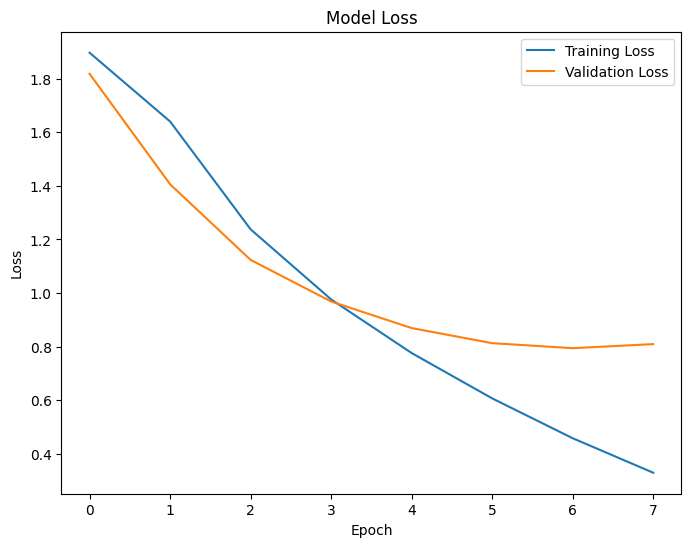

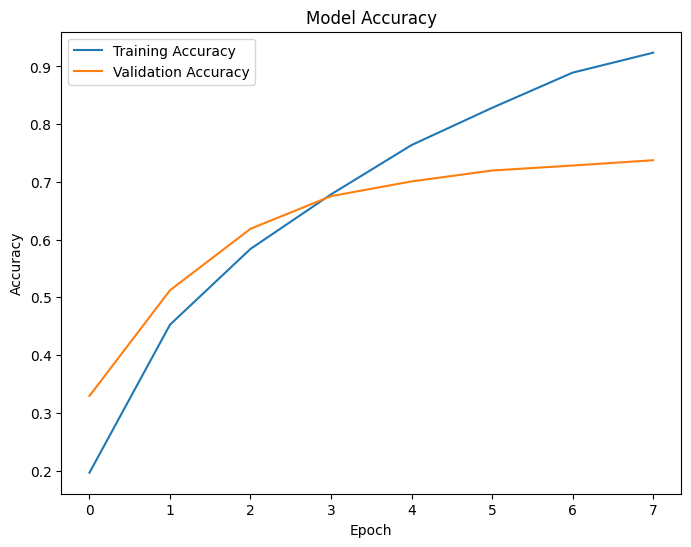

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

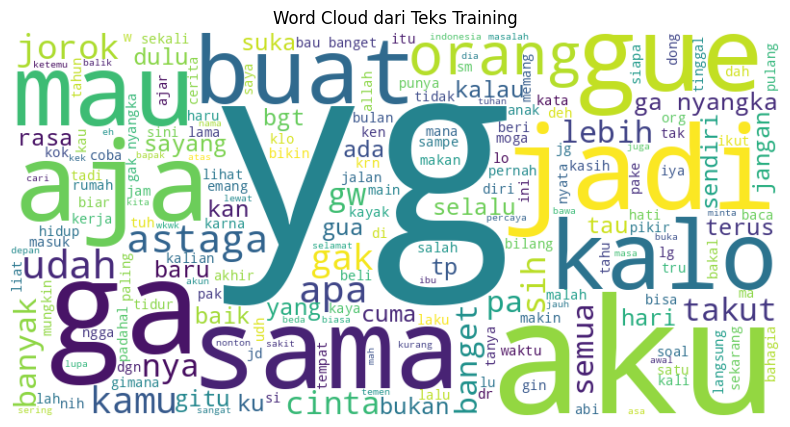

In [ ]:
all_text = ' '.join(text_train)
wordcloud = WordCloud(width=800, height=400, max_words=200, background_color='white').generate(all_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud dari Teks Training')
plt.show()

In [ ]:
new_text = ["apakah benar seperti itu ya? mantap juga sih"]
new_tfidf = tfidf_vectorizer.transform(new_text)
new_tfidf_dense = new_tfidf.toarray()
new_tfidf_reshaped = new_tfidf_dense.reshape((new_tfidf_dense.shape[0], 1, new_tfidf_dense.shape[1]))

prediction = model.predict(new_tfidf_reshaped)
predicted_label = np.argmax(prediction, axis=1)
predicted_proba = prediction.max(axis=1)

labels = ['anger', 'fear', 'love', 'sadness', 'shock', 'happy', 'disgust']
print(f"Teks: {new_text[0]}")
print(f"Label Prediksi: {labels[predicted_label[0]]}")
print(f"Probabilitas Prediksi: {predicted_proba[0]}")

1/1 [==============================] - 1s 506ms/step
Teks: apakah benar seperti itu ya? mantap juga sih
Label Prediksi: love
Probabilitas Prediksi: 0.3860258460044861


In [ ]:
y_pred = model.predict(X_test_tfidf_reshaped)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(label_test, axis=1)

print(classification_report(y_true, y_pred_classes, target_names=labels))

62/62 [==============================] - 1s 11ms/step
              precision    recall  f1-score   support

       anger       0.62      0.65      0.63       325
        fear       0.83      0.56      0.67       195
        love       0.71      0.79      0.75       197
     sadness       0.49      0.57      0.52       272
       shock       0.95      0.95      0.95       419
       happy       0.61      0.60      0.61       308
     disgust       0.98      0.96      0.97       246

    accuracy                           0.74      1962
   macro avg       0.74      0.72      0.73      1962
weighted avg       0.75      0.74      0.74      1962



# **Word2Vec**

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(text_train)
word_index = tokenizer.word_index

In [ ]:
train_sequences = tokenizer.texts_to_sequences(text_train)
test_sequences = tokenizer.texts_to_sequences(text_test)

In [ ]:
max_length = max(len(seq) for seq in train_sequences)

In [ ]:
X_train_padded = pad_sequences(train_sequences, maxlen=max_length, padding='post')
X_test_padded = pad_sequences(test_sequences, maxlen=max_length, padding='post')

In [ ]:
word2vec_model = Word2Vec(sentences=[text.split() for text in text_train], vector_size=100, window=5, min_count=1, workers=4)

In [ ]:
embedding_dim = 100
embedding_matrix = np.zeros((len(word_index) + 1, embedding_dim))

for word, i in word_index.items():
    if word in word2vec_model.wv:
        embedding_matrix[i] = word2vec_model.wv[word]

In [ ]:
embedding_layer = tf.keras.layers.Embedding(
    input_dim=len(word_index) + 1,
    output_dim=embedding_dim,
    weights=[embedding_matrix],
    input_length=max_length,
    trainable=False
)

In [ ]:
param_grid = {
    'batch_size': [64, 128, 256],
    'optimizer': ['adam', 'rmsprop'],  # Menambahkan optimizer
    'activation': ['relu', 'tanh']  # Menambahkan aktivasi
}

from tensorflow.keras.optimizers import Adam, RMSprop

def build_model(input_shape, optimizer='adam', activation='relu'):
    model = tf.keras.Sequential([
        embedding_layer,  # Sesuaikan dengan definisi embedding_layer Anda
        tf.keras.layers.LSTM(128, activation='relu', input_shape=input_shape),
        tf.keras.layers.Dense(64, activation=activation),
        tf.keras.layers.Dense(32, activation=activation),
        tf.keras.layers.Dropout(0.01),
        tf.keras.layers.Dense(7, activation='softmax')
    ])

    if optimizer == 'adam':
        opt = Adam()
    elif optimizer == 'rmsprop':
        opt = RMSprop()

    model.compile(loss='categorical_crossentropy',
                  optimizer=opt,
                  metrics=['accuracy'])

    return model

from sklearn.model_selection import ParameterGrid

best_accuracy = 0
best_params = {}

input_shape = (X_train_padded.shape[1],)  # Sesuaikan dengan input shape dari X_train_padded

# Loop over hyperparameters
for params in ParameterGrid(param_grid):
    batch_size = params['batch_size']
    optimizer = params['optimizer']
    activation = params['activation']

    print(f"Training with batch_size={batch_size}, optimizer={optimizer}, activation={activation}")

    model = build_model(input_shape, optimizer=optimizer, activation=activation)

    callbacks = [mycallbacks()]

    history = model.fit(X_train_padded,
                        label_train,
                        batch_size=batch_size,
                        epochs=num_epochs,
                        validation_data=(X_test_padded, label_test),
                        verbose=1,
                        callbacks=callbacks)

    loss, accuracy = model.evaluate(X_test_padded, label_test)
    print('Test loss:', loss)
    print('Test accuracy:', accuracy)

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_params = {
            'batch_size': batch_size,
            'optimizer': optimizer,
            'activation': activation
        }

print("Best Parameters:", best_params)
print("Best Accuracy:", best_accuracy)

Training with batch_size=64, optimizer=adam, activation=relu
Epoch 1/20
72/72 [==============================] - 15s 176ms/step - loss: 2.5367 - accuracy: 0.1650 - val_loss: 1.9226 - val_accuracy: 0.1595
Epoch 2/20
72/72 [==============================] - 12s 162ms/step - loss: 1.9440 - accuracy: 0.1919 - val_loss: 1.9199 - val_accuracy: 0.1656
Epoch 3/20
72/72 [==============================] - 11s 153ms/step - loss: 1.9233 - accuracy: 0.2002 - val_loss: 1.9131 - val_accuracy: 0.2350
Epoch 4/20
72/72 [==============================] - 14s 193ms/step - loss: 1.9118 - accuracy: 0.2384 - val_loss: 1.9022 - val_accuracy: 0.2452
Epoch 5/20
72/72 [==============================] - 24s 329ms/step - loss: 1.8955 - accuracy: 0.2544 - val_loss: 1.8793 - val_accuracy: 0.2742
Epoch 6/20
72/72 [==============================] - 11s 151ms/step - loss: 1.8497 - accuracy: 0.2666 - val_loss: 1.7943 - val_accuracy: 0.2844
Epoch 7/20
72/72 [==============================] - 13s 173ms/step - loss: 1.9235

In [ ]:
model = tf.keras.Sequential([
embedding_layer,
tf.keras.layers.LSTM(128, activation='tanh'),
tf.keras.layers.Dense(64, activation='tanh'),
tf.keras.layers.Dense(32, activation='tanh'),
tf.keras.layers.Dropout(0.01),
tf.keras.layers.Dense(7, activation='softmax')
])

model.compile(loss='categorical_crossentropy',
optimizer='adam',
metrics=['accuracy'])

class mycallbacks(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        if logs.get('accuracy') >= 0.90:
            print('\nEpoch', epoch, '\nAccuracy has reached = %2.2f%%' % (logs['accuracy'] * 100), 'so training is cancelled')
            self.model.stop_training = True


num_epochs = 20
history = model.fit(X_train_padded,
label_train,
epochs=num_epochs,
batch_size=64,
validation_data=(X_test_padded, label_test),
verbose=1,
callbacks=[mycallbacks()])

loss, accuracy = model.evaluate(X_test_padded, label_test)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

Epoch 1/20
72/72 [==============================] - 18s 187ms/step - loss: 1.8132 - accuracy: 0.2507 - val_loss: 1.8209 - val_accuracy: 0.2258
Epoch 2/20
72/72 [==============================] - 11s 154ms/step - loss: 1.7119 - accuracy: 0.2817 - val_loss: 1.6854 - val_accuracy: 0.2681
Epoch 3/20
72/72 [==============================] - 12s 171ms/step - loss: 1.6696 - accuracy: 0.2795 - val_loss: 1.6543 - val_accuracy: 0.2819
Epoch 4/20
72/72 [==============================] - 12s 162ms/step - loss: 1.6502 - accuracy: 0.2957 - val_loss: 1.6391 - val_accuracy: 0.3104
Epoch 5/20
72/72 [==============================] - 12s 163ms/step - loss: 1.6428 - accuracy: 0.2959 - val_loss: 1.6747 - val_accuracy: 0.3068
Epoch 6/20
72/72 [==============================] - 13s 177ms/step - loss: 1.6320 - accuracy: 0.3129 - val_loss: 1.6511 - val_accuracy: 0.2773
Epoch 7/20
72/72 [==============================] - 14s 199ms/step - loss: 1.6355 - accuracy: 0.3077 - val_loss: 1.7110 - val_accuracy: 0.2819

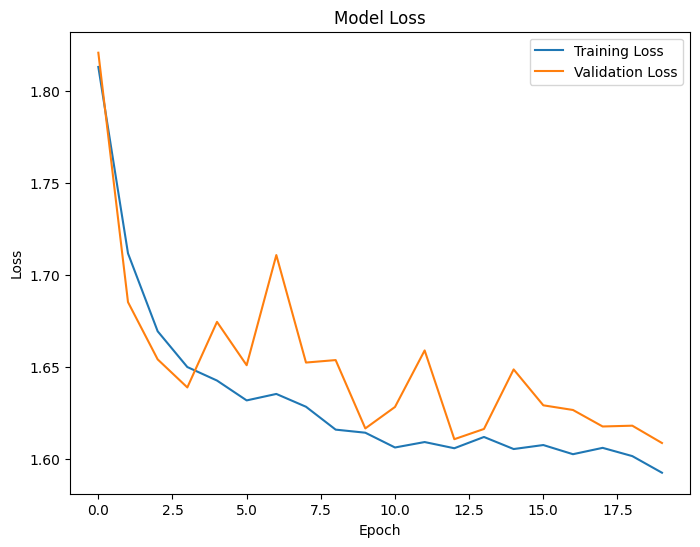

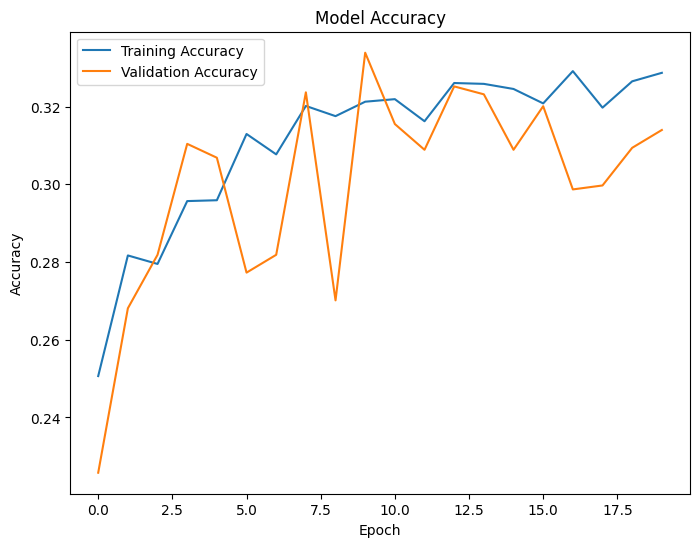

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

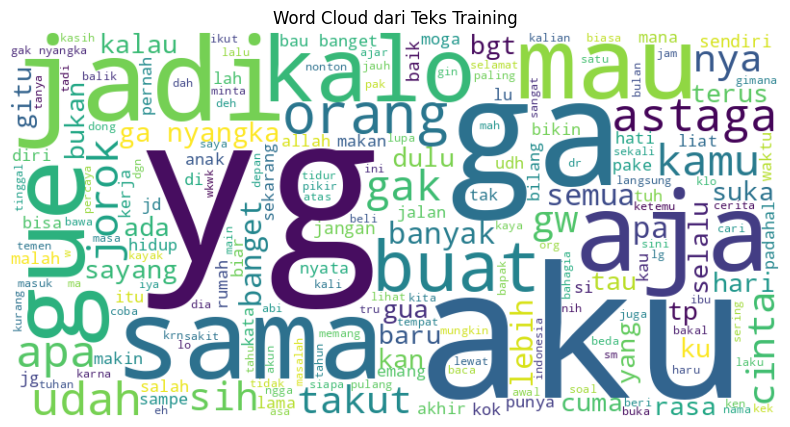

In [ ]:
all_text = ' '.join(text_train)
wordcloud = WordCloud(width=800, height=400, max_words=200, background_color='white').generate(all_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud dari Teks Training')
plt.show()

In [ ]:
new_text = ["saya sangat terluka mendengar ini"]
new_sequence = tokenizer.texts_to_sequences(new_text)
new_padded_sequence = pad_sequences(new_sequence, maxlen=max_length, padding='post')

prediction = model.predict(new_padded_sequence)

predicted_label = np.argmax(prediction, axis=1)
predicted_proba = prediction.max(axis=1)

labels = ['anger', 'fear', 'love', 'sadness', 'shock', 'happy', 'disgust']
print(f"Teks: {new_text[0]}")
print(f"Label Prediksi: {labels[predicted_label[0]]}")
print(f"Probabilitas Prediksi: {predicted_proba[0]}")

1/1 [==============================] - 1s 511ms/step
Teks: saya sangat terluka mendengar ini
Label Prediksi: shock
Probabilitas Prediksi: 0.4426710605621338


In [ ]:
y_pred = model.predict(X_test_padded)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(label_test, axis=1)
print(classification_report(y_true, y_pred_classes, target_names=labels))

62/62 [==============================] - 2s 34ms/step
              precision    recall  f1-score   support

       anger       0.23      0.09      0.13       325
        fear       0.18      0.07      0.10       195
        love       0.24      0.13      0.17       197
     sadness       0.20      0.55      0.29       272
       shock       0.48      0.79      0.60       419
       happy       0.33      0.19      0.24       308
     disgust       0.42      0.04      0.07       246

    accuracy                           0.31      1962
   macro avg       0.30      0.27      0.23      1962
weighted avg       0.31      0.31      0.26      1962

